## Modeling and Prediction of Average ACT Scores
- Multivariate Linear regression
- Random Forest (Decision Trees)

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [218]:
# two different lin reg packages to try
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [284]:
file = pd.read_csv('act_df.csv', index_col=0 )

In [285]:
scores = file[['School Name', 'AvgScrTotal', 'enroll12', 'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)', 'Dropout (Rate)', 'Percent (%) \nEligible FRPM \n(Ages 5-17)', 'Percent (%) \nEligible FRPM \n(K-12)', 'Percent (%) \nEligible Free \n(Ages 5-17)', 'Percent (%) \nEligible Free \n(K-12)', 'Regular HS Diploma Graduates (Rate)']]
scores = scores.dropna()

In [287]:
scores.shape
#scores.head()

(879, 11)

## Can Linear Regression Predict Scores?

In [288]:
X = scores[['enroll12', 'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)', 'Dropout (Rate)', 'Percent (%) \nEligible FRPM \n(Ages 5-17)', 'Percent (%) \nEligible FRPM \n(K-12)', 'Percent (%) \nEligible Free \n(Ages 5-17)', 'Percent (%) \nEligible Free \n(K-12)', 'Regular HS Diploma Graduates (Rate)']]
X = sm.add_constant(X)
y = scores['AvgScrTotal']

C:\Users\erica\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [289]:
# fit and make model predictions
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [290]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AvgScrTotal   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     309.6
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          4.48e-264
Time:                        17:55:36   Log-Likelihood:                -1686.4
No. Observations:                 879   AIC:                             3393.
Df Residuals:                     869   BIC:                             3441.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      24.8189      1.872     13.255      0.000      21.144      28.494
enroll12                                    0.0018      0.001      1.377      0.169      -0.001       0.004
Enrollment 
(Ages 5-17)                     0.0099      0.003      3.719      0.000       0.005       0.015
Enrollment 
(K-12)                         -0.0096      0.003     -3.656      0.000      -0.015      -0.004
Dropout (Rate)                             -0.0228      0.029     -0.800      0.424      -0.079       0.033
Percent (%) 
Eligible FRPM 
(Ages 5-17)   -39.4669     37.620     -1.049      0.294    -113.305      34.371
Percent (%) 
Eligible FRPM 
(K-12)         27.6996     37.780      0.733      0.464     -46.452     101.851
Percent (%) 
Eligible Free 
(Ages 5-17)    -1.1218     37.596     -0.030      0.976     -74.912      72.668
Percent (%) 
Eligible Free 
(K-12)          2.6454     37.790      0.070      0.944     -71.524      76.815
Regular HS Diploma Graduates (Rate)         0.0218      0.019      1.144      0.253      -0.016       0.059
==============================================================================
Omnibus:                       13.164   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.903
Skew:                           0.180   Prob(JB):                     0.000214
Kurtosis:                       3.576   Cond. No.                     3.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

~76% R-squared value means this model captures about 76% of the variance in y, the average ACT composite score.

#### Let's try sklearn Linear Regression module, this time splitting the data into training and testing sets:

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [292]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((703, 10), (176, 10), (703,), (176,))

In [293]:
lm = linear_model.LinearRegression() # fit model on training data
model = lm.fit(X_train, y_train)

In [294]:
print('Model Coefficients:', lm.coef_)

Model Coefficients: [ 0.00000000e+00  2.06594636e-03  1.10069347e-02 -1.08590031e-02
 -4.95788148e-02 -5.90947767e+01  4.70906833e+01  2.83605429e+01
 -2.65118697e+01  7.60671988e-03]


In [295]:
# predict scores for the test set
predictions = lm.predict(X_test) # predict on test data
print(predictions[0:15])

[25.09987199 24.86114815 18.69530089 17.42218762 23.83541791 18.70290065
 20.14895414 19.64295793 21.9125642  18.40436573 17.6047814  22.09388229
 17.01663924 22.82949763 26.01560436]


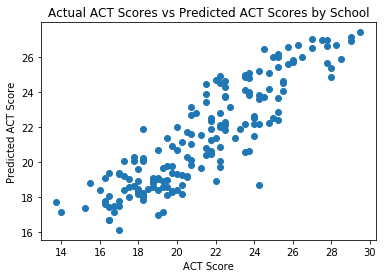

In [296]:
# Plot the predictions
plt.scatter(y_test, predictions)
plt.xlabel('ACT Score')
plt.ylabel('Predicted ACT Score')
plt.title('Actual ACT Scores vs Predicted ACT Scores by School')
plt.savefig('actualvpredicted.png')

In [297]:
print ("Accuracy:", round(100*model.score(X_test, y_test), 2), '%')

Accuracy: 77.95 %


Lin Reg gets about 76% accuracy rate.

In [298]:
# mean squared error to evaluate model
mse = np.mean(np.square(y_test - predictions))
print('Mean Squared Error:', mse)

Mean Squared Error: 2.584986371235831


## Can a Random Forest Regressor Predict Scores?

In [299]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [300]:
X = scores[['enroll12', 'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)', 'Dropout (Rate)', 'Percent (%) \nEligible FRPM \n(Ages 5-17)', 'Percent (%) \nEligible FRPM \n(K-12)', 'Percent (%) \nEligible Free \n(Ages 5-17)', 'Percent (%) \nEligible Free \n(K-12)', 'Regular HS Diploma Graduates (Rate)']]
y = scores['AvgScrTotal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(615, 9) (264, 9) (615,) (264,)


In [301]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [302]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

errors = abs(predictions - y_test) # calculate the absolute errors

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.37 degrees.


In [303]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 93.51 %


A Random Forest Regressor performs better than Linear Regression with accuracy rate of about 94%.

In [304]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
feature_list = ['enroll12', 'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)', 'Dropout (Rate)', 'Percent (%) \nEligible FRPM \n(Ages 5-17)', 'Percent (%) \nEligible FRPM \n(K-12)', 'Percent (%) \nEligible Free \n(Ages 5-17)', 'Percent (%) \nEligible Free \n(K-12)', 'Regular HS Diploma Graduates (Rate)']
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [305]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [306]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [320]:
# Predictions for all schools
predictions = rf.predict(X)

In [321]:
results = pd.DataFrame(y)
results = results.assign(pred = predictions)
merged = file.merge(results, left_index=True, right_index=True, how='inner')

In [322]:
merged['error'] = (merged['AvgScrTotal_y'] - merged['pred'])**2

In [327]:
merged.sort_values(by = 'AvgScrTotal_y', ascending=False).head(10)

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,AvgScrTotal_x,...,PctGE21.1,Percent (%) Eligible FRPM (Ages 5-17),Percent (%) Eligible FRPM (K-12),Percent (%) Eligible Free (Ages 5-17),Percent (%) Eligible Free (K-12),Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),AvgScrTotal_y,pred,error
140140,Lynbrook High,Fremont Union High,Santa Clara,461,212,32.0,31.0,32.0,31.0,31.50,...,96.70,0.064928,0.069805,0.057159,0.060606,220.0,97.8,31.50,30.30400,1.430416
12172,Mission San Jose High,Fremont Unified,Alameda,526,210,32.0,31.0,32.0,30.0,31.25,...,97.14,0.057143,0.058590,0.053634,0.054618,242.0,96.8,31.25,30.38725,0.744338
140200,Monta Vista High,Fremont Union High,Santa Clara,598,306,31.0,30.0,31.0,30.0,30.50,...,96.41,0.043441,0.045148,0.040886,0.042616,292.0,98.6,30.50,29.40100,1.207801
140500,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,329,150,31.0,30.0,31.0,30.0,30.50,...,95.33,0.018293,0.019202,0.018293,0.019202,150.0,98.0,30.50,30.11200,0.150544
50520,Dougherty Valley High,San Ramon Valley Unified,Contra Costa,780,366,31.0,30.0,30.0,29.0,30.00,...,95.63,0.069466,0.069738,0.063467,0.063512,376.0,97.9,30.00,27.49925,6.253751
101740,Troy High,Fullerton Joint Union High,Orange,693,207,30.0,29.0,30.0,29.0,29.50,...,93.24,0.305021,0.305638,0.252926,0.253709,329.0,97.1,29.50,27.55150,3.796652
592,Irvington High,Fremont Unified,Alameda,609,189,30.0,29.0,30.0,29.0,29.50,...,92.59,0.151411,0.151695,0.128743,0.129237,273.0,95.8,29.50,28.50400,0.992016
15444,Piedmont High,Piedmont City Unified,Alameda,188,85,31.0,30.0,28.0,29.0,29.50,...,97.65,0.011364,0.013530,0.011364,0.013530,97.0,100.0,29.50,29.43100,0.004761
127428,Canyon Crest Academy,San Dieguito Union High,San Diego,601,395,30.0,29.0,29.0,28.0,29.00,...,94.94,0.054718,0.054348,0.049564,0.049301,311.0,99.7,29.00,28.70900,0.084681
27596,Miramonte High,Acalanes Union High,Contra Costa,338,188,30.0,30.0,28.0,28.0,29.00,...,96.81,0.043580,0.042553,0.042023,0.041033,163.0,97.6,29.00,30.07050,1.145970


In [329]:
merged[merged['NumTstTakr'] >= 200].sort_values(by = 'error', ascending=False).head(10)

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,AvgScrTotal_x,...,PctGE21.1,Percent (%) Eligible FRPM (Ages 5-17),Percent (%) Eligible FRPM (K-12),Percent (%) Eligible Free (Ages 5-17),Percent (%) Eligible Free (K-12),Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),AvgScrTotal_y,pred,error
117840,Inderkum High,Natomas Unified,Sacramento,484,480,16.0,18.0,18.0,17.0,17.25,...,22.29,0.492248,0.493144,0.424419,0.426005,238.0,98.8,17.25,22.31975,25.702365
119668,Summit High,Fontana Unified,San Bernardino,579,540,16.0,17.0,18.0,17.0,17.00,...,22.41,0.676858,0.679817,0.538429,0.541528,270.0,95.7,17.00,20.66525,13.434058
84876,Palisades Charter High,Los Angeles Unified,Los Angeles,716,223,27.0,28.0,26.0,25.0,26.50,...,81.61,0.343127,0.341296,0.290442,0.289267,344.0,96.6,26.50,23.57625,8.548314
77516,Polytechnic High,Long Beach Unified,Los Angeles,1047,239,25.0,25.0,24.0,23.0,24.25,...,74.06,0.608976,0.608643,0.522936,0.523901,522.0,94.9,24.25,21.42175,7.998998
85648,Palos Verdes High,Palos Verdes Peninsula Unified,Los Angeles,465,282,27.0,27.0,26.0,26.0,26.50,...,88.30,0.046902,0.046682,0.044586,0.044432,212.0,99.1,26.50,29.20850,7.335972
119920,Fontana High,Fontana Unified,San Bernardino,573,521,14.0,16.0,17.0,16.0,15.75,...,12.28,0.925241,0.924444,0.808904,0.810101,278.0,97.5,15.75,18.38950,6.966960
50520,Dougherty Valley High,San Ramon Valley Unified,Contra Costa,780,366,31.0,30.0,30.0,29.0,30.00,...,95.63,0.069466,0.069738,0.063467,0.063512,376.0,97.9,30.00,27.49925,6.253751
115268,Murrieta Mesa High,Murrieta Valley Unified,Riverside,565,217,21.0,22.0,21.0,21.0,21.25,...,48.39,0.349807,0.348384,0.278040,0.277133,234.0,97.1,21.25,23.51950,5.150630
100708,Tesoro High,Capistrano Unified,Orange,647,302,26.0,26.0,26.0,25.0,25.75,...,86.09,0.097848,0.097948,0.088916,0.089431,325.0,97.6,25.75,27.86975,4.493340
114256,Temecula Valley High,Temecula Valley Unified,Riverside,669,219,22.0,24.0,22.0,22.0,22.50,...,68.04,0.286125,0.287095,0.240834,0.242236,302.0,95.9,22.50,24.57675,4.312891
